In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import fBM_data

In [2]:
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (10, 10)

In [3]:
# generate a bunch of fBM paths
hurst_exponents = np.around(np.linspace(0.3,0.7,5), decimals=1).tolist()
x_ex, y_ex = fBM_data.generate_fBM(n_paths=100, n_samples=300, hurst_exponents=hurst_exponents)

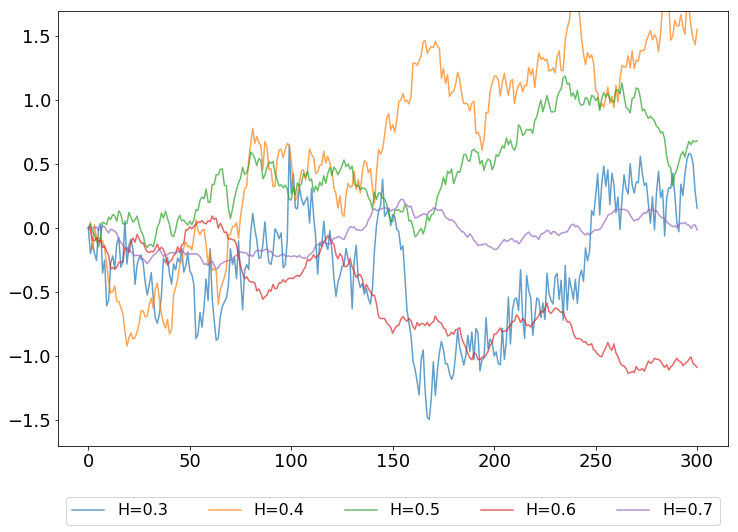

In [4]:
# plot a simple example
ex = [[(x_ex[k], y_ex[k]) for k in range(len(y_ex)) if y_ex[k] == i][0] for i in hurst_exponents]
fbm_dic = {}
for x, y in ex:
    fbm_dic['H={:.1f}'.format(y)] = x
pd.DataFrame.from_dict(fbm_dic).plot(figsize=(12,8), grid=False, alpha=0.7)
plt.legend(mode='expand', bbox_to_anchor=(0, -0.1, 1, 0), ncol=5, prop={'size': 16})
plt.ylim(-1.7, 1.7)
plt.savefig('../latex/figures/simulation.png', bbox_inches='tight')
plt.show()

In [5]:
# load saved performance
history = np.load("figures/hurst/history.npy", allow_pickle=True).all()

# load model parameters dict
params = np.load('figures/hurst/params.npy', allow_pickle=True).all()

# load training times
times = pd.read_csv('figures/hurst/timings.csv')

In [6]:
df_params = pd.DataFrame(index=['test log-loss', 
                                'test mse',
                                '# params', 'training time'])
for k in history:
    df_params[k] = [np.round(history[k]['val log-loss'][-1], 3), 
                    np.round(history[k]['val mse'][-1], 4),
                    np.int(params[k]), times[k].values[0]]
df_params = df_params.T

In [7]:
df_params

,test log-loss,test mse,# params,training time
DeepSigNet,-8.583,0.0002,9741.0,1125.0
SigNet,-7.046,0.0009,8777.0,178.0
"LinearSig (no backprop, depth: 4)",-4.495,0.0112,10313.0,161.0
LSTM,-5.541,0.0039,10832.0,812.0
GRU,-5.353,0.0047,9780.0,724.0
RNN,-4.729,0.0088,10635.0,365.0
ReluNet,-3.055,0.0471,11889.0,159.0


In [8]:
# adapted from jet
colors = np.array([[0.        , 0.        , 0.        , 1.        ],
                   [0.        , 0.06470588, 1.        , 1.        ],
                   [0.        , 0.64509804, 1.        , 1.        ],
                   [0.05882352, 0.51764705, 0.17647058, 1.        ],
                   [1.        , 0.72694263, 0.        , 1.        ],
                   [1.        , 0.18954248, 0.        , 1.        ],
                   [0.28627450, 0.18823529, 0.06666666, 1.        ]])

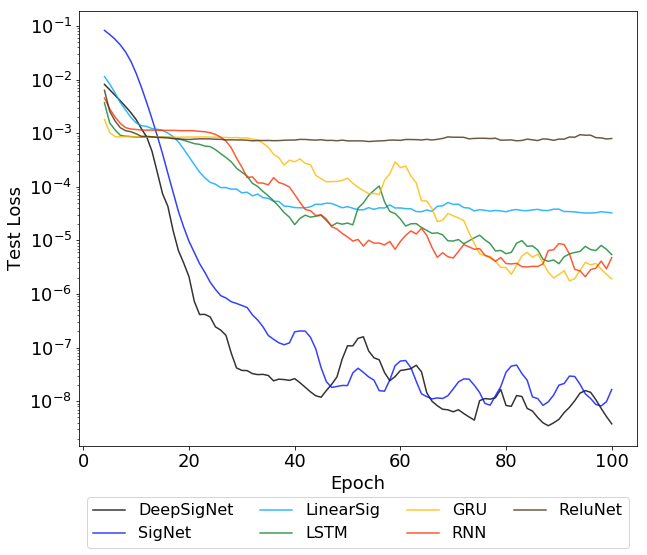

In [9]:
# define pd dataframe for losses
df_test_log = pd.DataFrame()
for k in history:
    df_test_log[k] = history[k]['val log-loss']

df_test_log.rename(columns={'LinearSig (no backprop, depth: 4)':'LinearSig'}, 
                   inplace=True)

fig, axes = plt.subplots(figsize=(10, 8))
# exp and log cancel each other out, but we get a log scale on the y axis.
# seems like a bit of a hack just to change the tick labels tbh
np.power(10, df_test_log.rolling(5).mean()).plot(grid=False, ax=axes, color=colors, lw=1.5, alpha=0.8)
plt.yscale('log', basey=10)
axes.set_xlabel('Epoch')
axes.set_ylabel('Test Loss')
# axes.set_ylim(0., 0.2)
# plt.suptitle('Learning Hurst exponent of fractional Brownian Motion with Neural Netoworks and Signatures')
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.legend(mode='expand', bbox_to_anchor=(0, -0.1, 1, 0), ncol=4, prop={'size': 16})
plt.savefig('../latex/figures/final_results.png', bbox_inches='tight')
plt.show()

In [56]:
all_predictions = np.load('figures/hurst/all_predictions.npy', allow_pickle=True)
all_true = np.load('figures/hurst/all_true.npy', allow_pickle=True)
all_r2 = np.load('figures/hurst/all_r2.npy', allow_pickle=True)

In [57]:
# adapted from jet
new = colors = np.array([[0.        , 0.        , 0.        , 1.        ],
                       [0.        , 0.06470588, 1.        , 1.        ],
                       [0.        , 0.64509804, 1.        , 1.        ],
                       [0.05882352, 0.51764705, 0.17647058, 1.        ],
                       [1.        , 0.72694263, 0.        , 1.        ],
                       [1.        , 0.18954248, 0.        , 1.        ],
                       [0.28627450, 0.18823529, 0.06666666, 1.        ],
                       [0.28627450, 0.18823529, 0.06666666, 1.        ]])

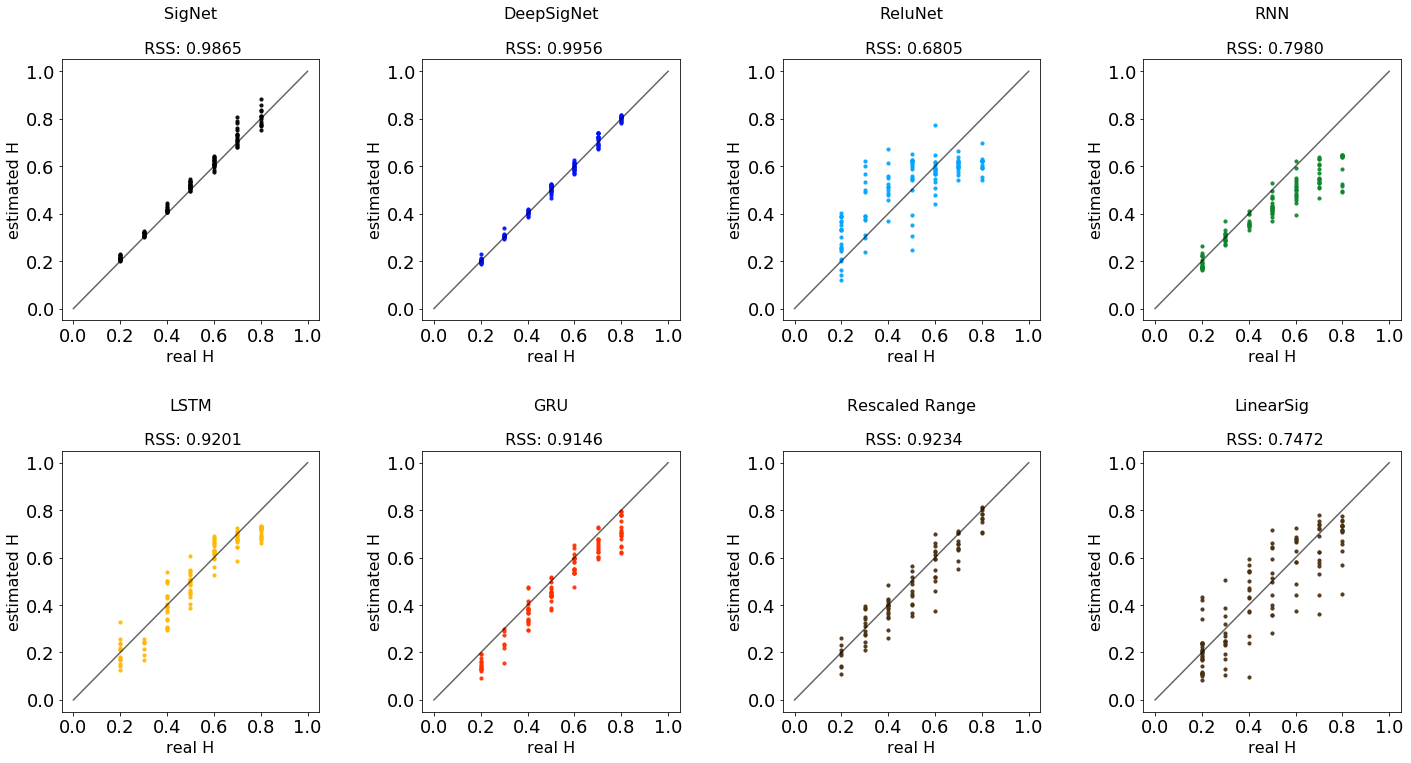

In [58]:
# plot results
fig, axes = plt.subplots(2, 4, figsize=(24, 12))

titles = ['SigNet', 
          'DeepSigNet', 
          'ReluNet', 
          'RNN', 
          'LSTM', 
          'GRU', 
          'Rescaled Range',
          'LinearSig']

for ax, h_p, h_t, cc, r2, tit in zip(axes.flatten(), all_predictions, all_true, colors, all_r2, titles):
    not_point_one = h_t > 0.15  # Because we don't have data for 0.9, so just balancing things out
    h_p = np.extract(not_point_one, h_p)
    h_t = np.extract(not_point_one, h_t)
    ax.scatter(h_t, h_p, c=cc, alpha=0.9, marker='o', s=10)
    x = np.linspace(start=0, endpoint=1, num=len(h_p), stop=1)
    ax.plot(x, x, 'black', alpha=0.6)
    ax.set_ylabel('estimated H', size=16)
    ax.set_xlabel('real H', size=16)
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_title(tit + '\n\n RSS: {:.4f}'.format(r2), size=16)
plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.savefig('../latex/figures/hurst_est.png', bbox_inches='tight')
plt.show()